# Univariate Visualizations

## Bar Charts

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

```sb.countplot(data = df, x = 'cat_var')```


```base_color = sb.color_palette()[0]
sns.countplot(data = df, x = 'cat_var', color = base_color)```

```base_color = sb.color_palette()[0]
cat_order = df['cat_var'].value_counts().index
sns.countplot(data = df, x = 'cat_var', color = base_color, order = cat_order)```



- this method requires pandas v0.21 or later

```level_order = ['Alpha', 'Beta', 'Gamma', 'Delta']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df['cat_var'] = df['cat_var'].astype(ordered_cat)```


- horizontal bar chart

```base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'cat_var', color = base_color)```

- horizontal labels

```base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color)
plt.xticks(rotation = 90)```

### Absolute vs. Relative Frequency

- Relative Frequency : The proportion of the data that falls in each category


- get proportion taken by most common group for derivation
- of tick marks

```n_points = df.shape[0]
max_count = df['cat_var'].value_counts().max()
max_prop = max_count / n_points```

- generate tick mark locations and names

```tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]```

- create the plot

```base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')```

### use text annotations to label the frequencies on bars

```python
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color)

# add annotations
n_points = df.shape[0]
cat_counts = df['cat_var'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels


for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')
    
```

### Counting Missing Data

```python
na_counts = df.isna().sum()
base_color = sns.color_palette()[0]
sns.barplot(na_counts.index.values, na_counts, color = base_color)
```

## Pie Charts - Relative Frequency

### When to use pie or donut charts
1. Showing how the data is broken down into parts
2. Plotting a small number of slices (two or three)


```python
# code for the pie chart seen above
sorted_counts = df['cat_var'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')
```

### Donut chart
```python
sorted_counts = df['cat_var'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')
```

## Histograms

- A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:

```python 

plt.hist(data = df, x = 'num_var')

bin_edges = np.arange(0, df['num_var'].max()+1, 1)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

sb.distplot(df['num_var'])

bin_edges = np.arange(0, df['num_var'].max()+1, 1)
sb.distplot(df['num_var'], bins = bin_edges, kde = False,
            hist_kws = {'alpha' : 1}) 
```

```python
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = df, x = 'num_var')
```

```python
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'cat_var', color = base_color, ax = ax)
```

```python
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df['num_var'].max()+4, 4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df['num_var'].max()+1/4, 1/4)
plt.hist(data = df, x = 'num_var', bins = bin_edges)
```

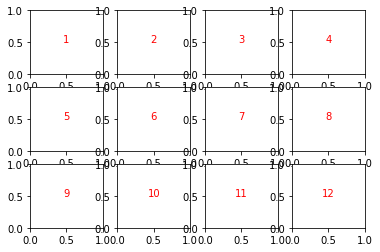

In [3]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1, ha='center',color='r') # print conventional subplot index number to middle of Axes

### adding gaps between bars: rwidth (discrete data)
```python 
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1))
```

### change a histogram's axis limits

```python
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df['skew_var'].max()+2.5, 2.5)
plt.hist(data = df, x = 'skew_var', bins = bin_edges)

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 35+1, 1)
plt.hist(data = df, x = 'skew_var', bins = bin_edges)
plt.xlim(0, 35) # could also be called as plt.xlim((0, 35))
```

## Scales and Transformations

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. (If you need a refresher on the logarithm function, check out this lesson on Khan Academy.)

```python
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, data.max()+100, 100)
plt.hist(data, bins = bin_edges)
plt.xlabel('values')

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(data) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(values)')
```

```python
bin_edges = 10 ** np.arange(0.8, np.log10(data.max())+0.1, 0.1)
plt.hist(data, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)
```

``` It is important that the xticks are specified after xscale since that function has its own built-in tick settings.```

```python
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, sqrt_trans(data.max())+1, 1)
plt.hist(data.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(data.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))
```

# Bivariate Visualizations
[Introduction](https://www.youtube.com/watch?v=JzvJIWG8Rk4&feature=youtu.be)

1. Scatterplots for quantitative variable vs. quantitative variable
2. Violin plots for quantitative variable vs. qualitative variable
3. Clustered bar charts for qualitative variable vs. qualitative variable

- 01 [Pearson correlation coefficient](https://youtu.be/wqMwTDVT9_Y) [code](https://youtu.be/wBDC5AmYgyg)
- 02 [Overpoltting, Tansparency and Jitter](https://youtu.be/BGqR-nxgMtg) [code](https://youtu.be/0F6ldBC6Nbs)
- 03 [Heat Maps](https://youtu.be/RyCdvsmBjtE) [code](https://youtu.be/O6ElT4IFXc0)

##### Heat maps for quantitative variable vs. quantitative variable
- Good for discrete variable vs. discrete variable
- Good alternativate to transparency for a lot of data
- Bin sizes are important



- 04 [Violin Plots](https://youtu.be/0hr61L-LZyM) [code](https://youtu.be/f8Kh4PByiEA)
###### Violin plots for quantitative variable vs. qualitative variable



- 05 [Box Plots](https://youtu.be/3gxJag12T0g) [code](https://youtu.be/f6v3L3IDo24)
  IQR = Q3-Q1
  1.5*IQR = the most common upper bound on the length of the whiskers
  
```python

plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

```

```python

base_color = sb.color_palette()[0]
sb.violinplot(data = df, x = 'cat_var', y = 'num_var', color = base_color,
              inner = 'quartile')

```

- 06 [Clustered Bar Charts](https://youtu.be/0rFp55TtEJM) [code](https://youtu.be/OnzWhpgM9Vs)

```python
sb.countplot(data = df, x = 'cat_var1', hue = 'cat_var2')

ax = sb.countplot(data = df, x = 'cat_var1', hue = 'cat_var2')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')

ct_counts = df.groupby(['cat_var1', 'cat_var2']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'cat_var2', columns = 'cat_var1', values = 'count')

sb.heatmap(ct_counts, annot = True, fmt = 'd')

```

- 07 [Faceting](https://youtu.be/oUYRqI6wFGw) [code](https://youtu.be/3Ls6w8Cd8n4)

- multiple copies of the same type of plot visualized on different subsets of the data
- quantitative variable against the qualitative subsets of the data

```python
g = sb.FacetGrid(data = df, col = 'cat_var')
g.map(plt.hist, "num_var")

bin_edges = np.arange(-3, df['num_var'].max()+1/3, 1/3)
g = sb.FacetGrid(data = df, col = 'cat_var')
g.map(plt.hist, "num_var", bins = bin_edges)

group_means = df.groupby(['many_cat_var']).mean()
group_order = group_means.sort_values(['num_var'], ascending = False).index

g = sb.FacetGrid(data = df, col = 'many_cat_var', col_wrap = 5, size = 2,
                 col_order = group_order)
g.map(plt.hist, 'num_var', bins = np.arange(5, 15+1, 1))
g.set_titles('{col_name}')

```

- 08 [Adaptation of Univariate Plots](https://youtu.be/MXcqplnUB0o) [code](https://youtu.be/aJncRqqJUYI)


- 09 [Lesson Summary](https://youtu.be/5igqM44KEmw) 

### Summary 

1. Scatterplots: two quantitative variables
2. Clustered bar charts: two qnalitative variables
3. Heat maps:2d histograms and bar charts
4. Violin and box plots: one quantitative and one qualitative variable
5. adapt univariate plots to bivariate data(adaptation of Univariate plots)
6. Faceting: multiple univariate plots acrossing the subsets of a second variable as well as using a second variables mean instead of count.
7. Line plots: changes in value across time

# Multivariate Exploration of Data

- [Non-Positional Encodings for Third Variables](https://youtu.be/D91mm-qaDkk)     [code](https://youtu.be/bgDNMfG9Gfs)
   - three numeric variables
   - two numeric variables and one categorical variable
   - one numeric variable and two categorical variables
   - three categorical variables
   <hr />
     
     
      - shape - qualititative variable
      - size - quantitative variable
      - color - both

- [Color Pallete](https://youtu.be/nirOTWkuiSM)     [code](https://youtu.be/iokI7HrxeNc)

    - Color can be used for both qualitative and quantitative values
    - three major palette types: qualitative, sequential and divergent
    - Qualitative Palette, no ordering is implied, no individual levels are important than others.
    - Sequential Palette should be used for ordianl and numeric data.
    - Divergent Palette: ordinal or numeric data have a meaning ful center point.
    

    

- [Faceting in Two Directions](https://youtu.be/lz5dcoTcV2o)     [code](https://youtu.be/v19gCP4TvwE)
- [Other Adaptations of Bivariate Plots](https://youtu.be/qanSZttNzFM)     [code](https://youtu.be/BzzTlWHMyV0)
- [Plot Matrices](https://youtu.be/2wY-euTIE5g)     [code](https://youtu.be/fq-hakwfpZw)
- [Feature Engineering](https://youtu.be/jpMOSFMMga4)     [code](https://youtu.be/xlZ9AMV6VUE)
- [Lesson Summary](https://youtu.be/SOBCduyymkQ)

# Explanatory Visulizations

In [ ]:
- [Introduction](https://youtu.be/gLy8qpursJI)
